In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.base import TransformerMixin
from sklearn.preprocessing import (FunctionTransformer, StandardScaler)
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.stats import boxcox
from sklearn.model_selection import (train_test_split, KFold , StratifiedKFold, 
                                     cross_val_score, GridSearchCV, 
                                     learning_curve, validation_curve)
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from collections import Counter
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from time import time

%matplotlib inline 
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [43]:
df = pd.read_csv('C:\\Users\\DELL\\Downloads\\Glass Identification.csv')
features = df.columns[:-1].tolist()
print(features)
print(df.shape)

['1', '1.52101', '13.64', '4.49', '1.10', '71.78', '0.06', '8.75', '0.00', '0.00.1']
(213, 11)


In [44]:
df.head(15)

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
5,7,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
6,8,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
7,9,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
8,10,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1
9,11,1.51571,12.72,3.46,1.56,73.20,0.67,8.09,0.0,0.24,1


In [45]:
df.dtypes

1            int64
1.52101    float64
13.64      float64
4.49       float64
1.10       float64
71.78      float64
0.06       float64
8.75       float64
0.00       float64
0.00.1     float64
1.1          int64
dtype: object

In [46]:
df.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [47]:
df.dtypes.value_counts()

float64    9
int64      2
Name: count, dtype: int64

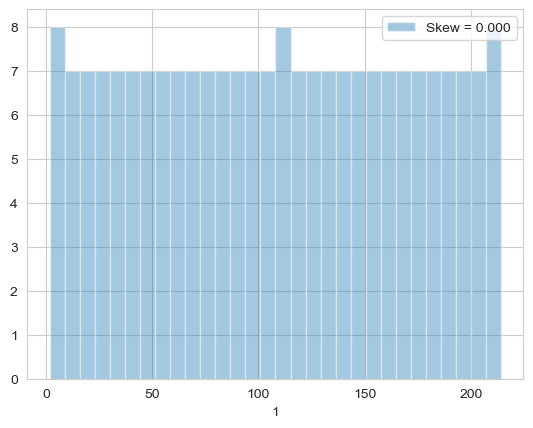

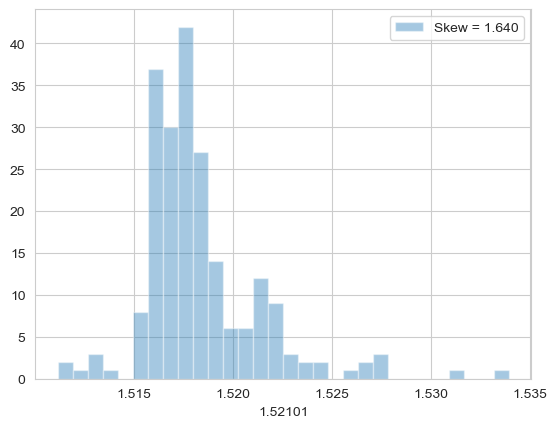

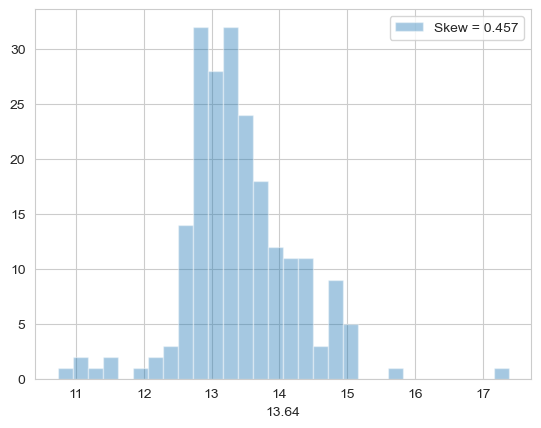

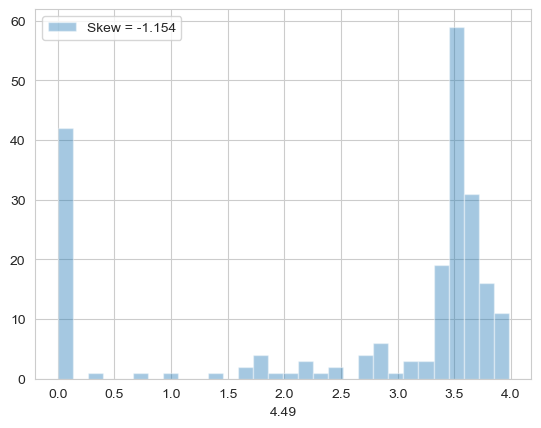

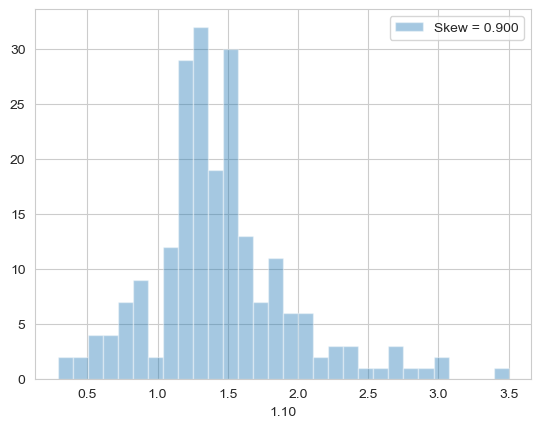

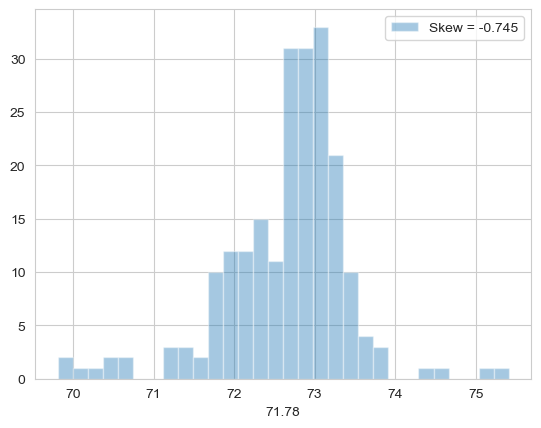

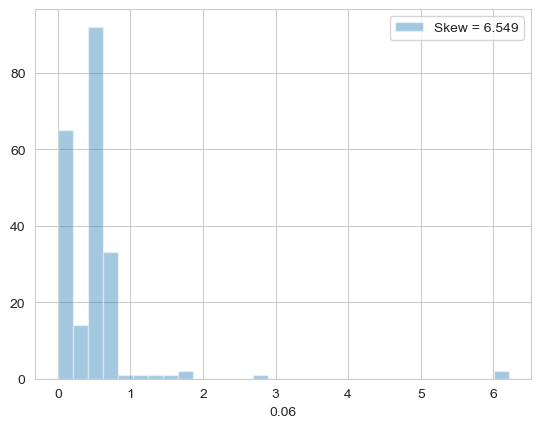

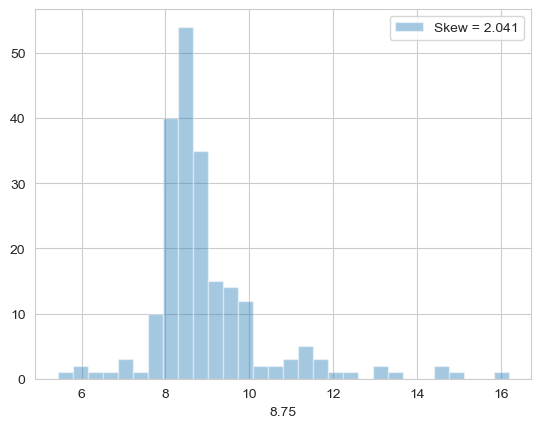

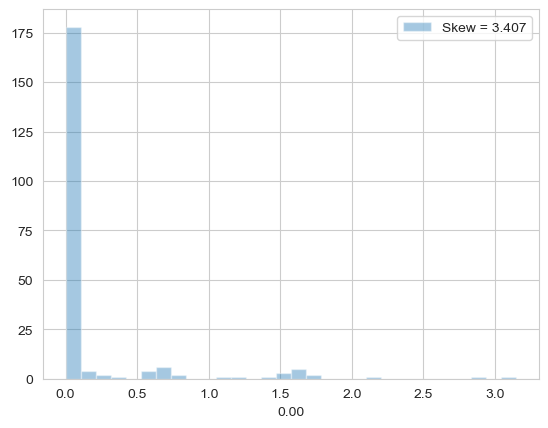

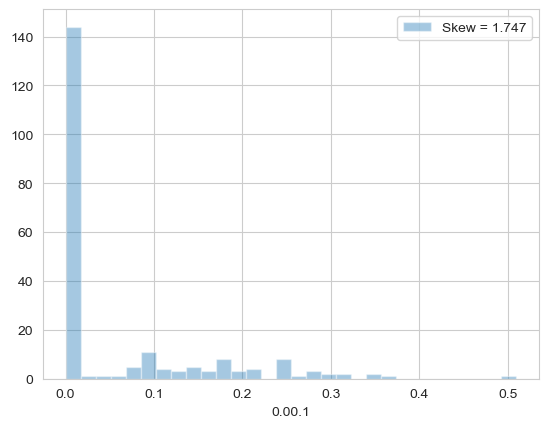

In [7]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [8]:
def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers. 
    """
    outlier_indices = []
    
    
    for col in df.columns.tolist():
        
        Q1 = np.percentile(df[col], 25)
        
        
        Q3 = np.percentile(df[col],75)
        
        
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        
        
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
    
        outlier_indices.extend(outlier_list_col)
        
    
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
    
    return multiple_outliers   
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[features]))))   

The dataset contains 14 observations with more than 2 outliers


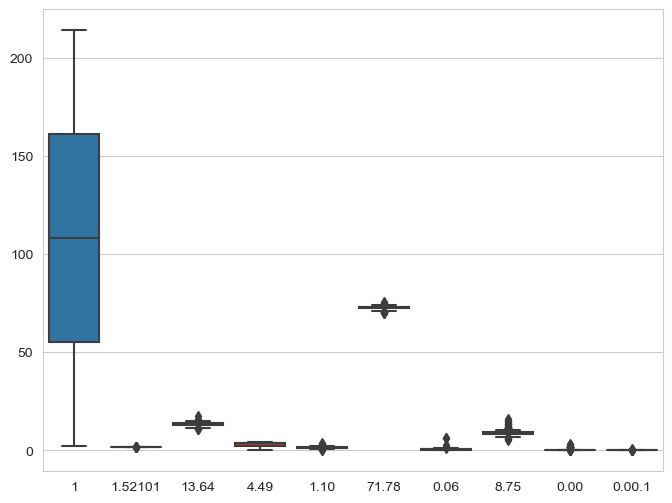

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(df[features])
plt.show()

<Figure size 800x800 with 0 Axes>

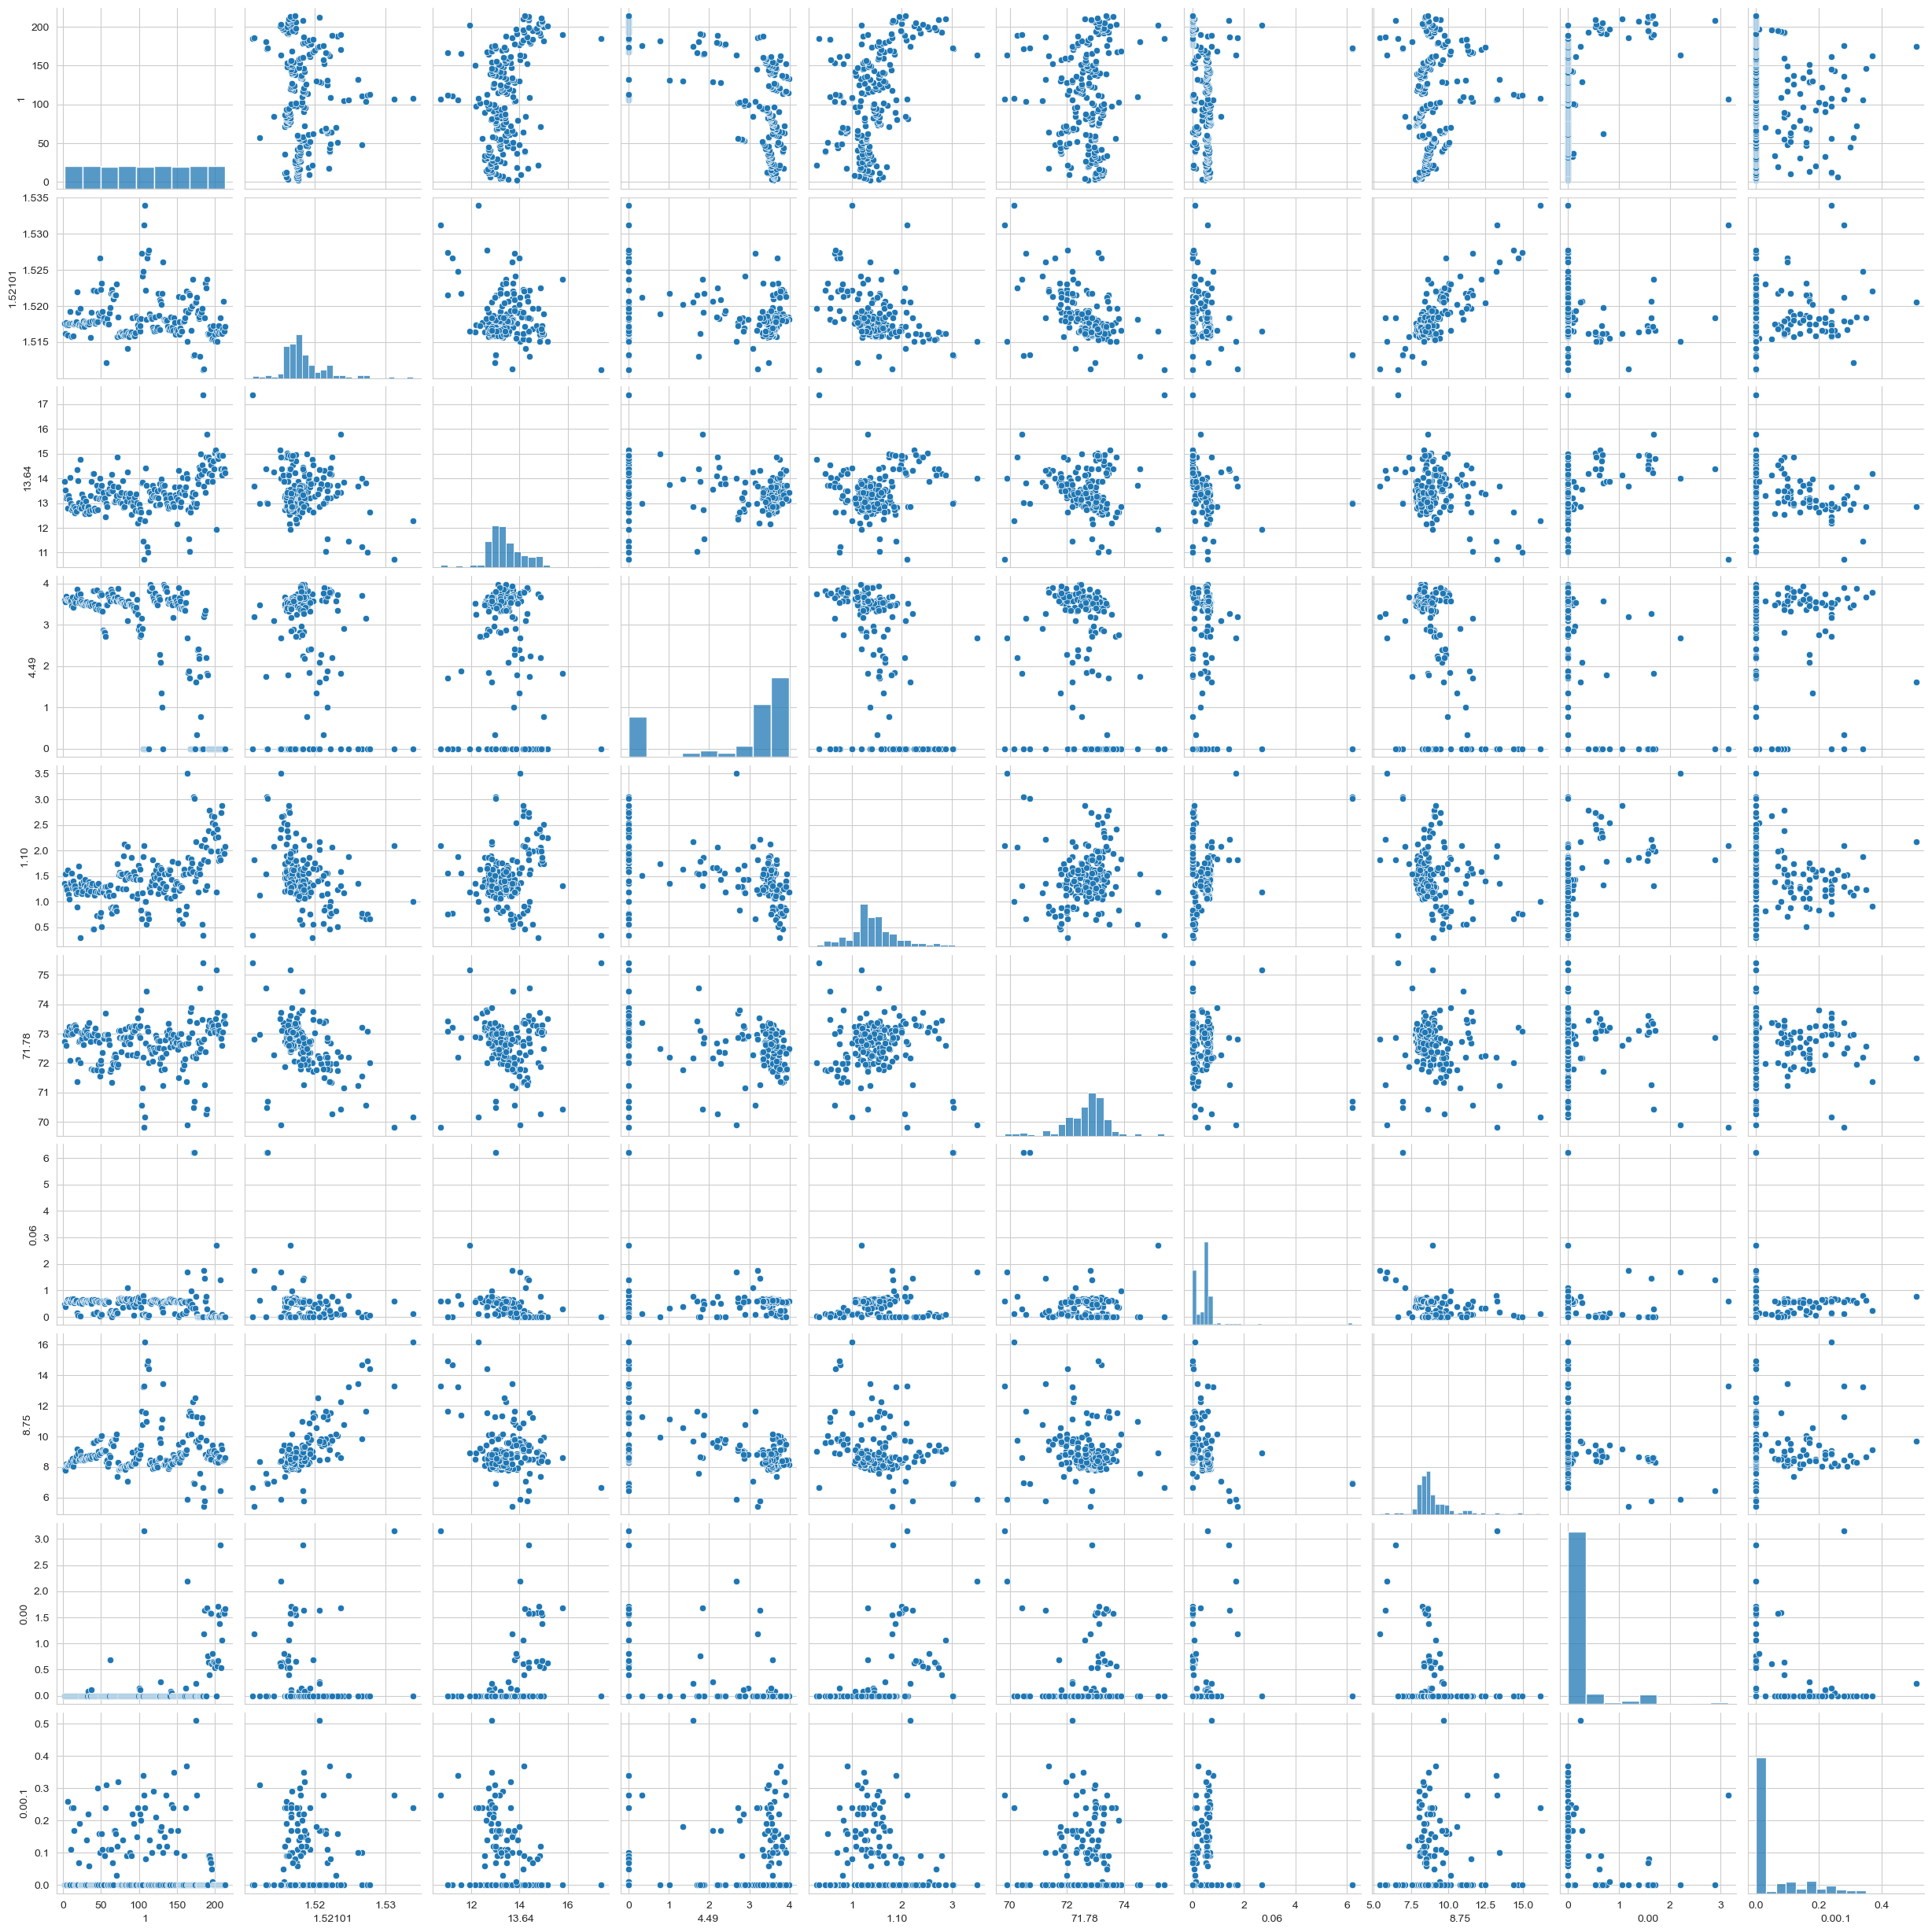

In [17]:
plt.figure(figsize=(8,8))
sns.pairplot(df[features],palette='coolwarm')
plt.show()

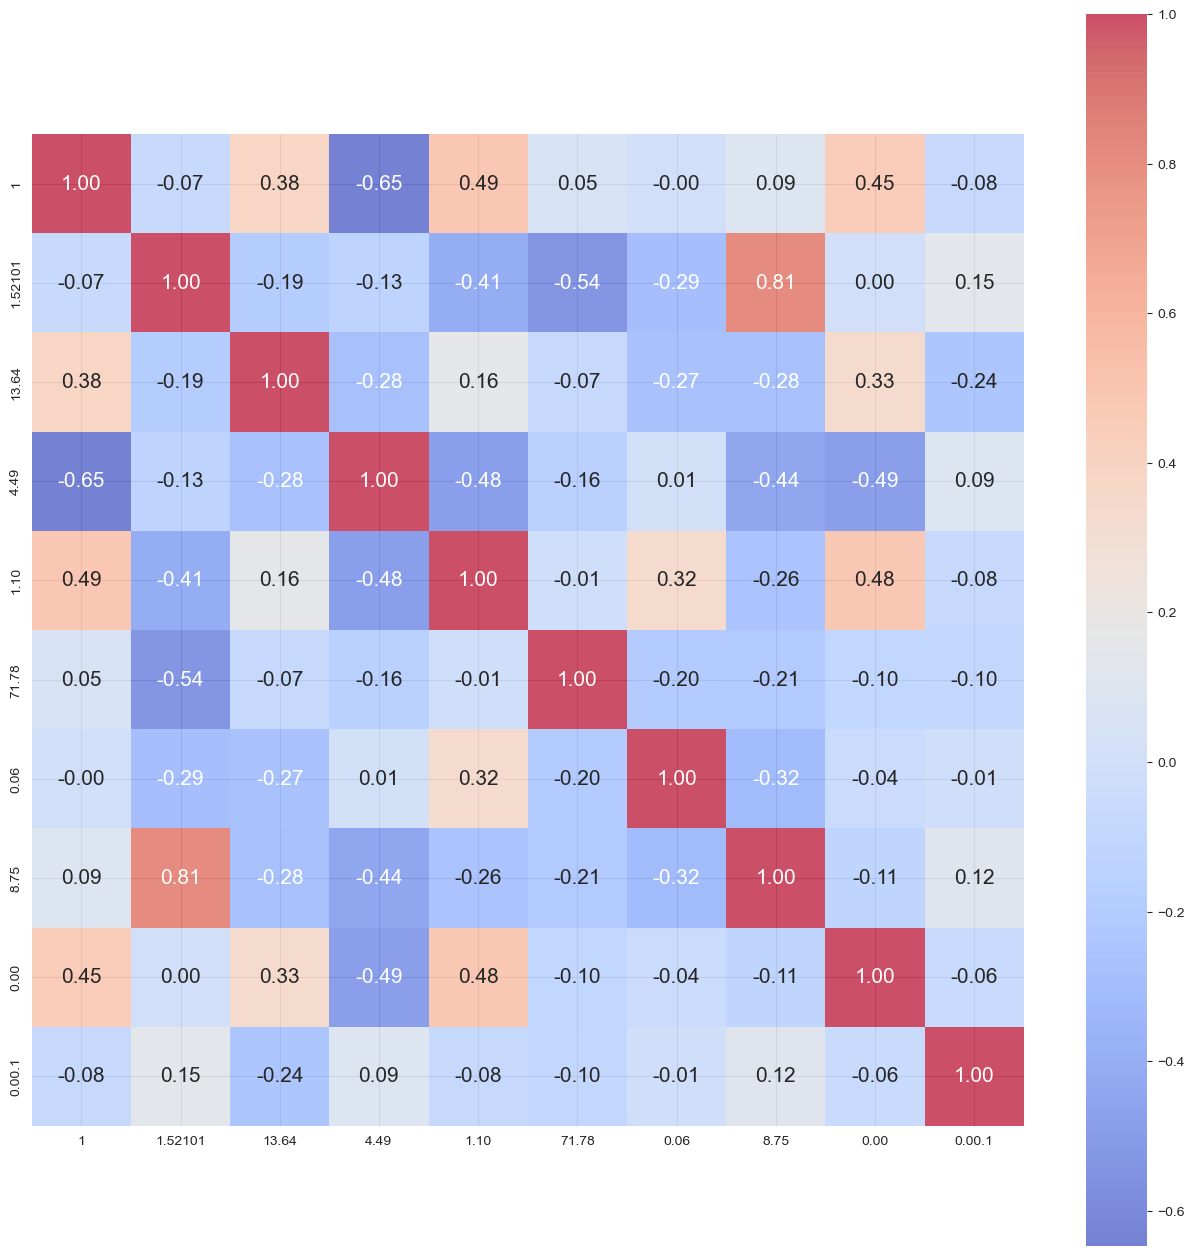

In [10]:
corr = df[features].corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   1        213 non-null    int64  
 1   1.52101  213 non-null    float64
 2   13.64    213 non-null    float64
 3   4.49     213 non-null    float64
 4   1.10     213 non-null    float64
 5   71.78    213 non-null    float64
 6   0.06     213 non-null    float64
 7   8.75     213 non-null    float64
 8   0.00     213 non-null    float64
 9   0.00.1   213 non-null    float64
 10  1.1      213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


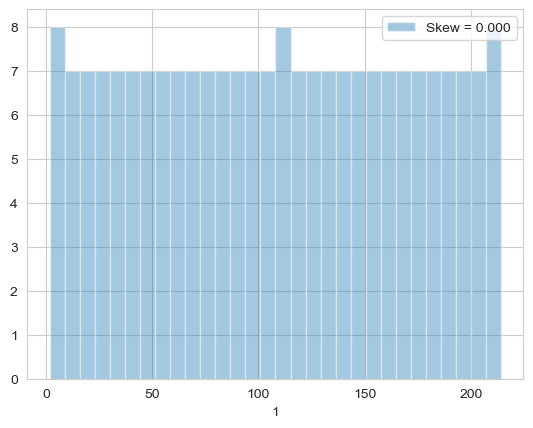

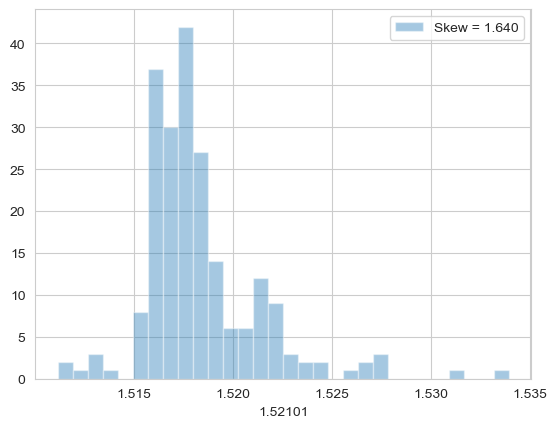

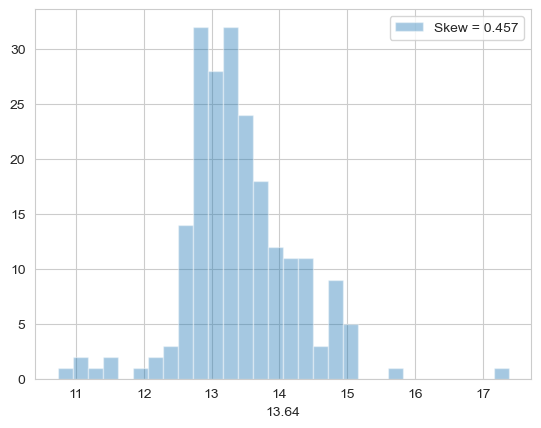

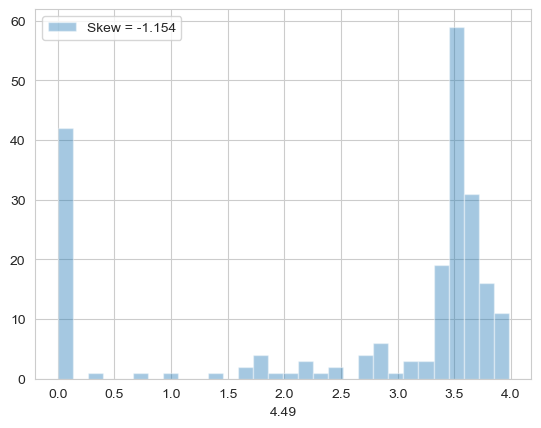

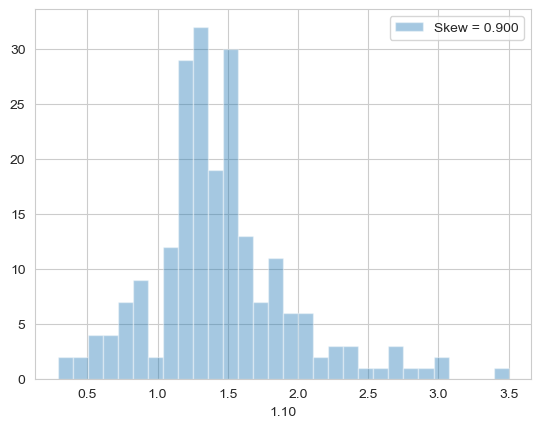

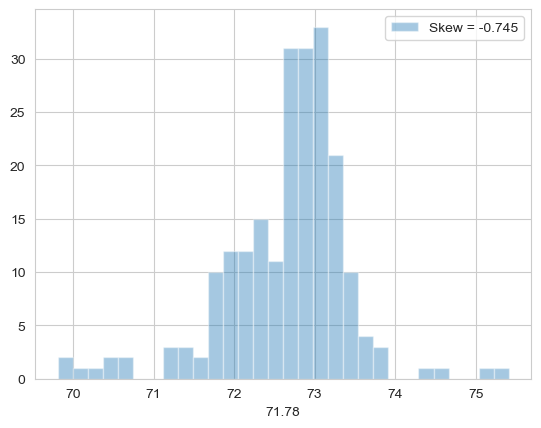

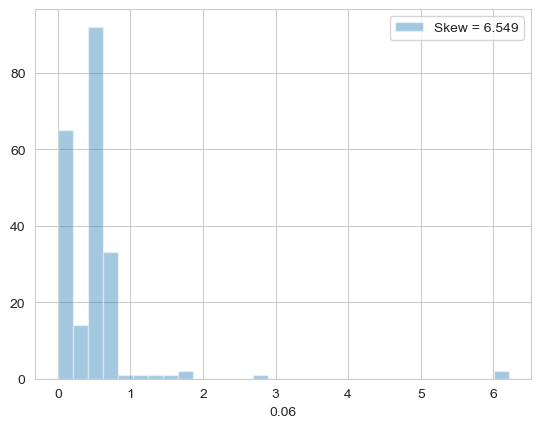

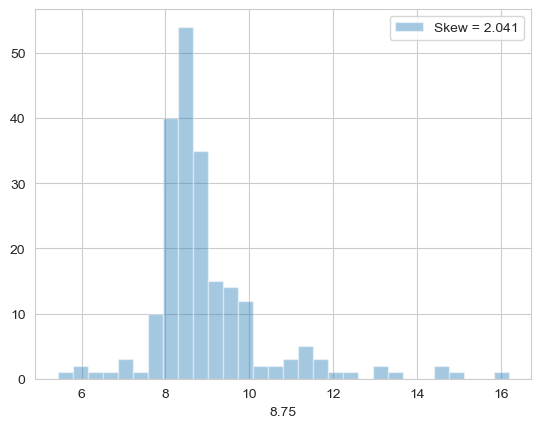

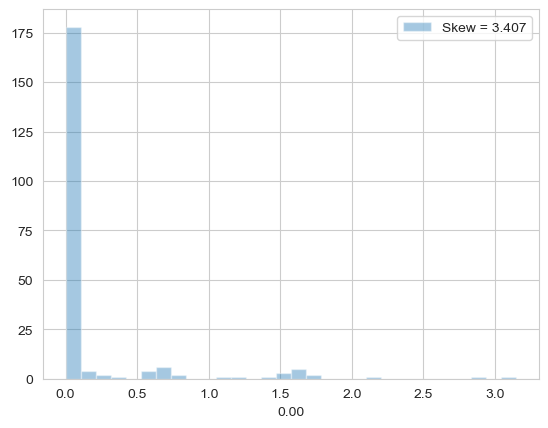

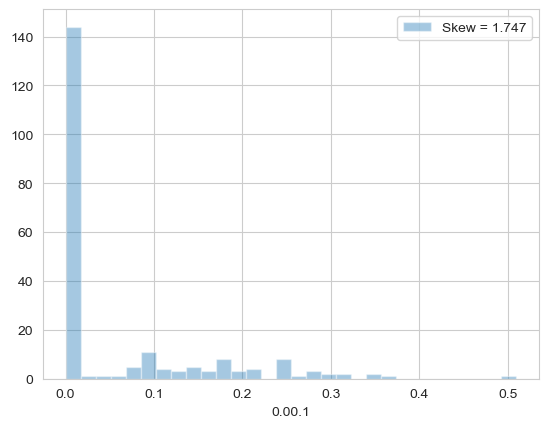

In [20]:
for feat in features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde=False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

In [49]:
df.dtypes.value_counts()

float64    9
int64      2
Name: count, dtype: int64

In [27]:
sns.countplot.dtypes
plt.show()

AttributeError: 'function' object has no attribute 'dtypes'

In [26]:
X = df[features] 
y = df['dtypes'] 

seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

KeyError: 'dtypes'

In [34]:
features_boxcox = []

for feature in features:
    bc_transformed, _ = boxcox(df[feature]+1)
    features_boxcox.append(bc_transformed)

features_boxcox = np.column_stack(features_boxcox)
df_bc = pd.DataFrame(data=features_boxcox, columns=features)
df_bc.dtypes == df.dtypes

ValueError: Can only compare identically-labeled Series objects

In [35]:
df_bc.describe()

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1
count,213.000000,2.130000e+02,213.000000,213.000000,213.000000,2.130000e+02,213.000000,213.000000,213.000000,213.000000
mean,37.953221,8.691398e-04,2.067199,9.654754,0.879782,5.513911e+22,0.279472,0.703740,0.019347,0.018832
std,17.644601,2.716891e-18,0.033187,5.565505,0.202393,7.166394e+21,0.172163,0.005557,0.042519,0.027670
min,1.676370,8.691398e-04,1.945130,0.000000,0.255052,3.307500e+22,0.000000,0.678193,0.000000,0.000000
25%,23.935532,8.691398e-04,2.047221,5.211366,0.787797,5.124553e+22,0.115192,0.701141,0.000000,0.000000
50%,39.565652,8.691398e-04,2.063950,12.634541,0.863337,5.599121e+22,0.360564,0.702967,0.000000,0.000000
75%,53.125882,8.691398e-04,2.085271,13.438588,0.972916,5.896871e+22,0.380669,0.705590,0.000000,0.051480
max,65.482574,8.691398e-04,2.207901,16.162453,1.518462,8.742176e+22,0.874039,0.721703,0.119982,0.068376


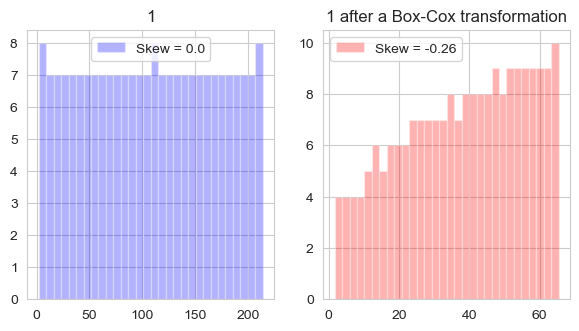

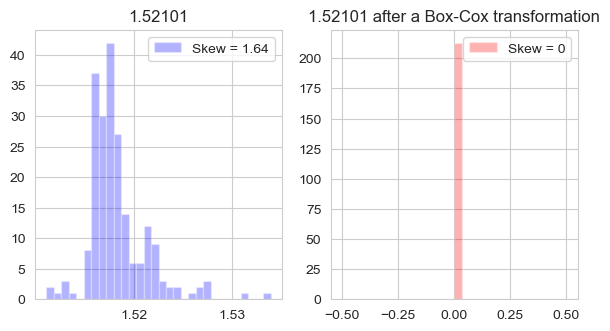

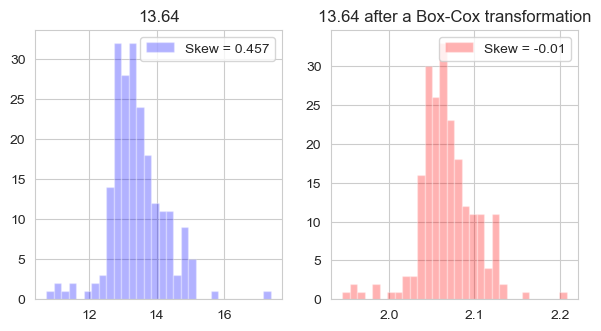

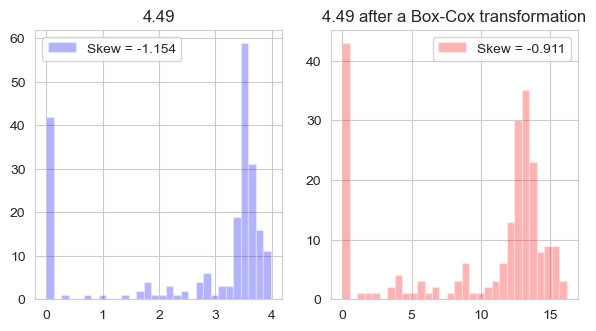

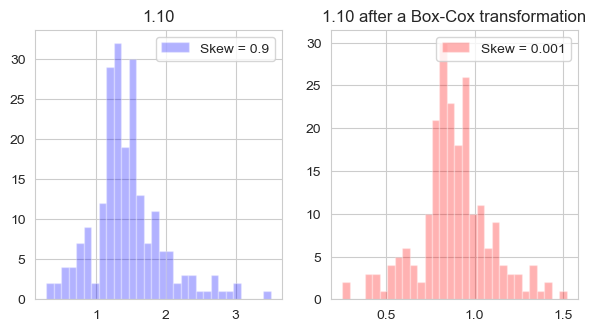

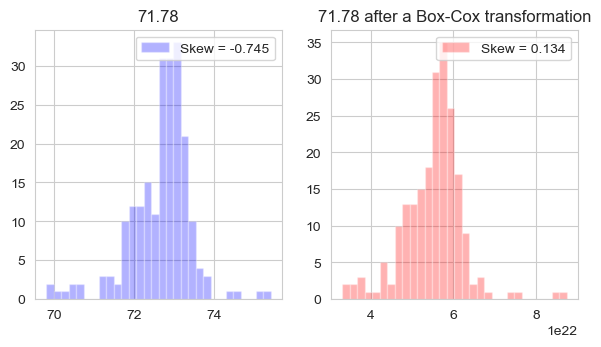

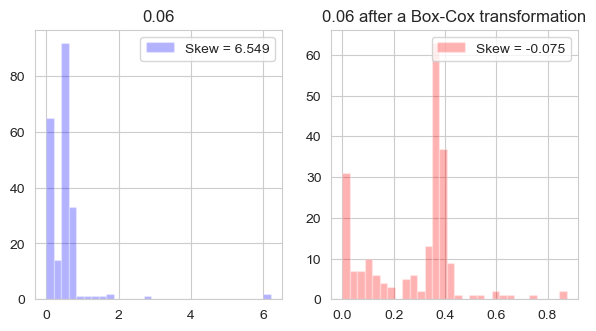

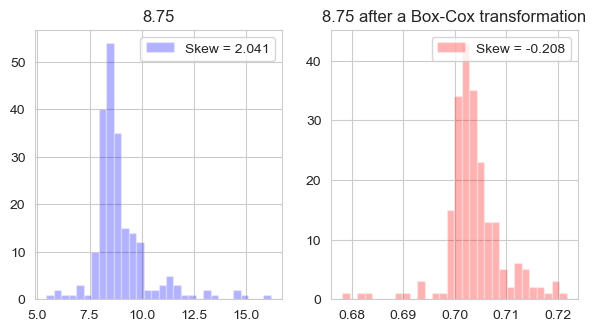

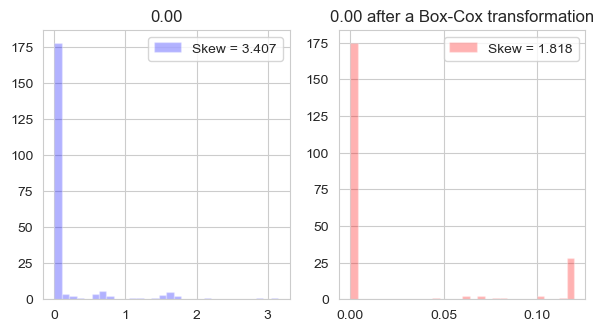

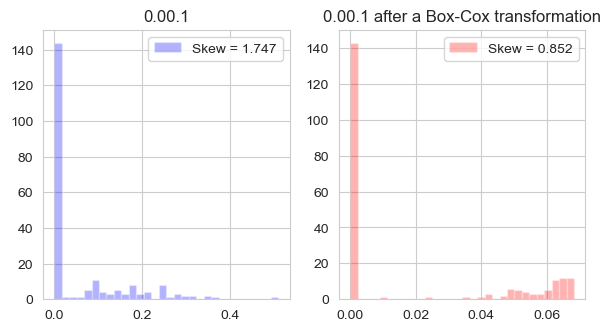

In [36]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(7,3.5))    
    ax[0].hist(df[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))) )
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    ax[1].hist(df_bc[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df_bc[feature].skew(),3))) )
    ax[1].set_title(str(feature)+' after a Box-Cox transformation')
    ax[1].legend(loc=0)
    plt.show()

In [37]:
for feature in features:
    delta = np.abs( df_bc[feature].skew() / df[feature].skew() )
    if delta < 1.0 :
        print('Feature %s is less skewed after a Box-Cox transform' %(feature))
    else:
        print('Feature %s is more skewed after a Box-Cox transform'  %(feature))

Feature 1 is more skewed after a Box-Cox transform
Feature 1.52101 is less skewed after a Box-Cox transform
Feature 13.64 is less skewed after a Box-Cox transform
Feature 4.49 is less skewed after a Box-Cox transform
Feature 1.10 is less skewed after a Box-Cox transform
Feature 71.78 is less skewed after a Box-Cox transform
Feature 0.06 is less skewed after a Box-Cox transform
Feature 8.75 is less skewed after a Box-Cox transform
Feature 0.00 is less skewed after a Box-Cox transform
Feature 0.00.1 is less skewed after a Box-Cox transform


In [38]:
model_importances = XGBClassifier(n_jobs=-1, min_child_weight=0.1)
start = time()
model_importances.fit(X_train, y_train)
print('Elapsed time to train XGBoost  %.3f seconds' %(time()-start))
plot_importance(model_importances)
plt.show()

NameError: name 'XGBClassifier' is not defined

In [51]:
pca = PCA(random_state = seed)
pca.fit(X_train)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
plt.figure(figsize=(8,6))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance explained', \
       alpha = 0.7)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance explained', \
        color= 'red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()
for i, sum in enumerate(cum_var_exp):
    print("PC" + str(i+1), "Cumulative variance: %.3f% %" %(cum_var_exp[i]*100))

NameError: name 'seed' is not defined

In [52]:
n_components = 5
pipelines = []
n_estimators = 200

#print(df.shape)

pipelines.append( ('SVC',
                   Pipeline([
                              ('sc', StandardScaler()),
                             ('SVC', SVC(random_state=seed))]) ) )


pipelines.append(('KNN',
                  Pipeline([ 
                              ('sc', StandardScaler()),
                            ('KNN', KNeighborsClassifier()) ])))
pipelines.append( ('RF',
                   Pipeline([
                             ('RF', RandomForestClassifier(random_state=seed, n_estimators=n_estimators)) 
                        ]) ))


pipelines.append( ('Ada',
                   Pipeline([ 
                    ('Ada', AdaBoostClassifier(random_state=seed,  n_estimators=n_estimators)) ]) ))

pipelines.append( ('ET',
                   Pipeline([
                             ('ET', ExtraTreesClassifier(random_state=seed, n_estimators=n_estimators)) 
                   ]) ))
pipelines.append( ('GB',
                   Pipeline([ 
                             ('GB', GradientBoostingClassifier(random_state=seed)) 
                   ]) ))

pipelines.append( ('LR',
                    Pipeline([
                              ('sc', StandardScaler()),
                             ('LR', LogisticRegression(random_state=seed)) ]) ))

results, names, times  = [], [] , []
num_folds = 10
scoring = 'accuracy'

for name, model in pipelines:
    start = time()
    kfold = StratifiedKFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(
        model, 
        X_train, y_train,
        cv=kfold, 
        scoring = scoring,
        n_jobs=-1
    ) 
    t_elapsed = time() - start
    results.append(cv_results)
    names.append(name)
    times.append(t_elapsed)
    msg = "%s: %f (+/- %f) performed in %f seconds" % (name, 100*cv_results.mean(), 
                                                       100*cv_results.std(), t_elapsed)
    print(msg)


fig = plt.figure(figsize=(12,8))    
fig.suptitle("Algorithms comparison")
ax = fig.add_subplot(1,1,1)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

NameError: name 'seed' is not defined

In [53]:
pipe_rfc = Pipeline([ 
    ('rfc', RandomForestClassifier(random_state=seed, n_jobs=-1) )
])


param_grid_rfc =[{
    'rfc__n_estimators': [50, 100, 150], # number of estimators
    'rfc__max_features':[0.1, 0.2 , 0.3], # maximum features used at each split
    'rfc__max_depth': [5,], # Max depth of the trees
    'rfc__min_samples_split': [0.12, 0.15, 0.2], # mininal samples in leafs
}]


kfold = StratifiedKFold(n_splits=num_folds, random_state= seed)
grid_rfc = GridSearchCV(
    pipe_rfc, 
     param_grid= 
    param_grid_rfc, 
    cv=kfold, 
    scoring=scoring, 
    verbose= 1, 
    n_jobs=-1
)

start = time()
grid_rfc = grid_rfc.fit(X_train, y_train)
end = time()
print("RFC grid search took %.3f seconds" %(end-start))


print('-------Best score----------')
print(grid_rfc.best_score_ * 100.0)
print('-------Best params----------')
print(grid_rfc.best_params_)

NameError: name 'seed' is not defined

In [57]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes,train_mean + train_std,
                    train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='test score', color='red',marker='o')
    plt.fill_between(
        train_sizes,test_mean + test_std, 
        test_mean - test_std , 
        color='red', alpha=alpha
        )
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Accuracy')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()    
    
def plot_validation_curve(param_range, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range,train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='test score', color='red', marker='o')
    plt.fill_between(
        param_range,test_mean + test_std, test_mean - test_std , 
        color='red', alpha=alpha
    )
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel('Parameter value')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()    

In [55]:
plt.figure(figsize=(9,6))

train_sizes, train_scores, test_scores = learning_curve(
    estimator= grid_rfc.best_estimator_ ,
    X= X_train, y = y_train, 
    train_sizes=np.arange(0.1,1.1,0.1),
    cv= 10,  
    scoring='accuracy', 
    n_jobs= - 1)

plot_learning_curve(train_sizes, train_scores, test_scores, title='Learning curve for RFC')

NameError: name 'grid_rfc' is not defined

<Figure size 900x600 with 0 Axes>